In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
data = pd.read_csv('data3a.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
y    100 non-null int64
x    100 non-null float64
f    100 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


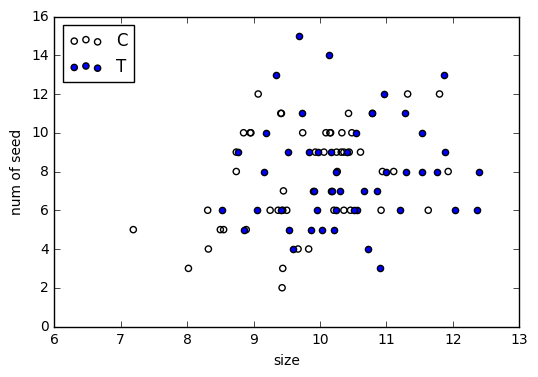

In [6]:
plt.scatter(data[data.f=='C'].x,data[data.f=='C'].y,label='C',facecolor='none')
plt.scatter(data[data.f=='T'].x,data[data.f=='T'].y,label='T')
plt.xlabel('size')
plt.ylabel('num of seed')
plt.legend(loc='upper left')
plt.show()

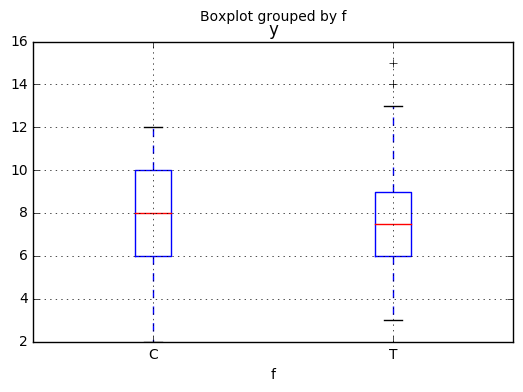

In [9]:
data.boxplot('y',by='f')

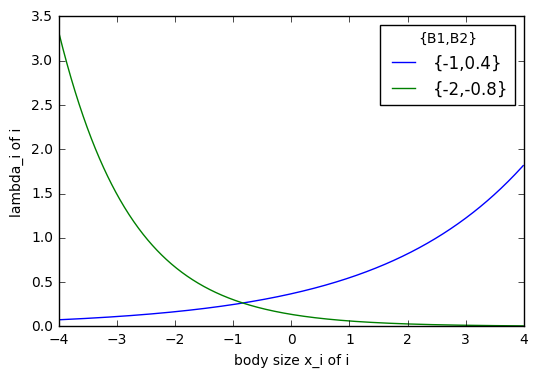

In [10]:
x = np.arange(-4,4,0.01)
plt.plot(x,np.exp(-1+0.4*x),label='{-1,0.4}')
plt.plot(x,np.exp(-2-0.8*x),label='{-2,-0.8}')
plt.legend(title='{B1,B2}')
plt.xlabel('body size x_i of i')
plt.ylabel('lambda_i of i')

In [12]:
import statsmodels.api as sm

In [13]:
data.x_c = sm.add_constant(data.x)
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Fri, 20 Jan 2017   Deviance:                       84.993
Time:                        23:45:44   Pearson chi2:                     83.8
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000         0.579     2.005
x              0.0757      0.036      2.125      0.034         0.006     0.145
==============================================================================
"""

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


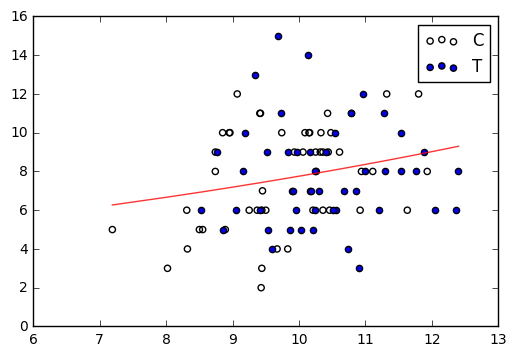

In [21]:
plt.scatter(data[data.f=='C'].x,data[data.f=='C'].y,facecolor='none',label='C')
plt.scatter(data[data.f=='T'].x,data[data.f=='T'].y,label='T')
plt.legend()
plt.plot(data.sort_index(by='x').x,result.predict(data.x_c.sort_index(by='x')),c='r',alpha=0.8)

In [22]:
data['f_int'] = (data.f=='T').astype(int)

In [23]:
data.x_c = sm.add_constant(data.f_int)

In [24]:
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Fri, 20 Jan 2017   Deviance:                       89.475
Time:                        23:55:18   Pearson chi2:                     87.1
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0516      0.051     40.463      0.000         1.952     2.151
f_int          0.0128      0.071      0.179      0.858        -0.127     0.153
==============================================================================
"""

In [27]:
data.x_c = sm.add_constant(data[['x','f_int']])
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Fri, 20 Jan 2017   Deviance:                       84.808
Time:                        23:57:43   Pearson chi2:                     83.8
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2631      0.370      3.417      0.001         0.539     1.988
x              0.0801      0.037      2.162      0.031         0.007     0.153
f_int         -0.0320      0.074     -0.430      0.667        -0.178     0.114
==============================================================================
"""

In [33]:
para_const = result.params[0]
para_x = result.params[1]
para_f = result.params[2]

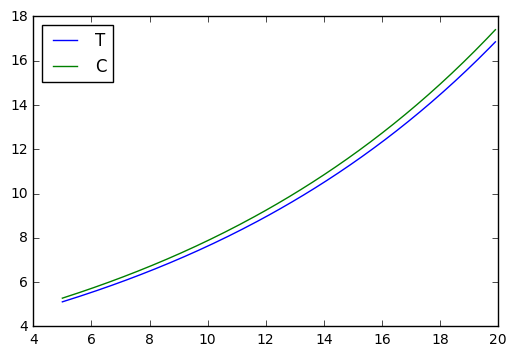

In [34]:
x = np.arange(5,20,0.1)
plt.plot(x,np.exp(para_const+para_x*x+para_f),label='T')
plt.plot(x,np.exp(para_const+para_x*x),label='C')
plt.legend(loc='upper left')

In [35]:
import statsmodels

In [36]:
data.x_c = sm.add_constant(data[['x','f_int']])
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson(statsmodels.genmod.families.links.identity))

In [38]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:               identity   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.16
Date:                Sat, 21 Jan 2017   Deviance:                       84.538
Time:                        00:06:01   Pearson chi2:                     83.6
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2671      2.843      0.446      0.656        -4.306     6.840
x              0.6606      0.290      2.281      0.023         0.093     1.228
f_int         -0.2048      0.582     -0.352      0.725        -1.346     0.936
==============================================================================
"""

In [39]:
para_const = result.params[0]
para_x = result.params[1]
para_f = result.params[2]

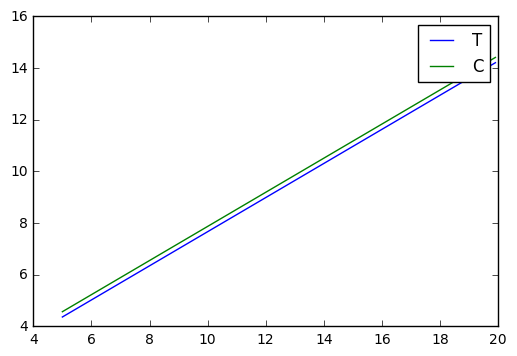

In [41]:
x = np.arange(5,20,0.1)
plt.plot(x,para_const+para_x*x+para_f,label='T')
plt.plot(x,para_const+para_x*x,label='C')
plt.legend()